# Import Libraries

In [470]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Reading Data by using pandas

In [471]:
df=pd.read_csv("/kaggle/input/job-analysis/ai_job_market_insights.csv")

In [472]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


# Explore Data 

### Reading first 5 rows

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


### Inspecting DataFrame Columns

In [474]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

### Counting Missing Values in DataFrame

In [475]:
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

### Counting Duplicate Rows in DataFrame

In [476]:
df.duplicated().sum()

0

### Summary Statistics of DataFrame

In [477]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


### Visualizing Frequency Distributions of DataFrame Columns

                               Job_Title


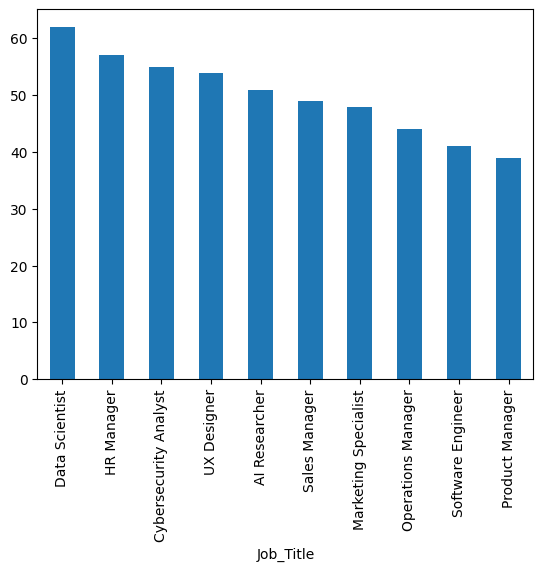

*********************************************************************
                               Industry


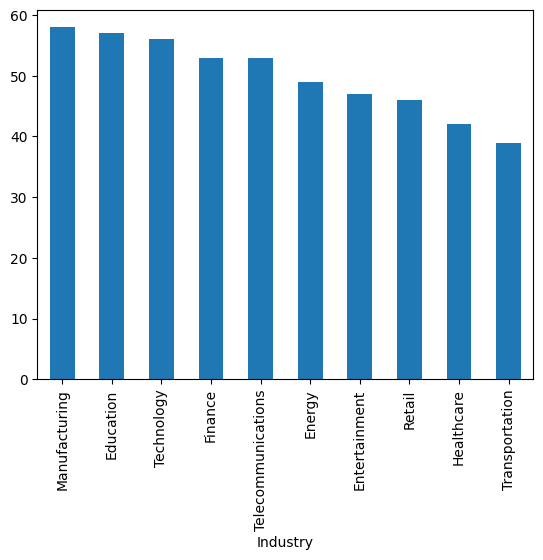

*********************************************************************
                               Company_Size


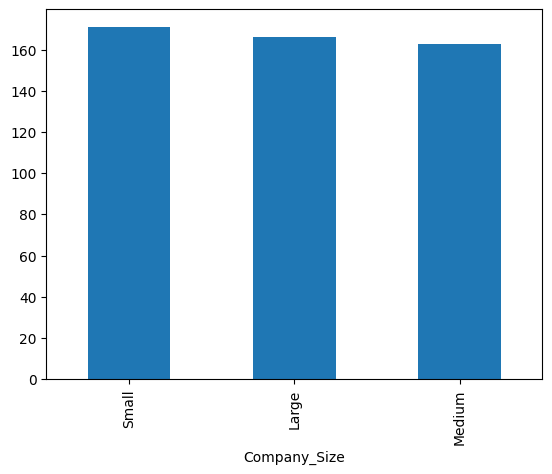

*********************************************************************
                               Location


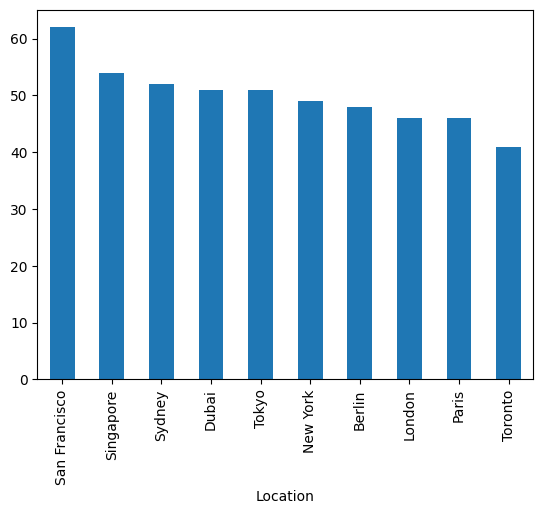

*********************************************************************
                               AI_Adoption_Level


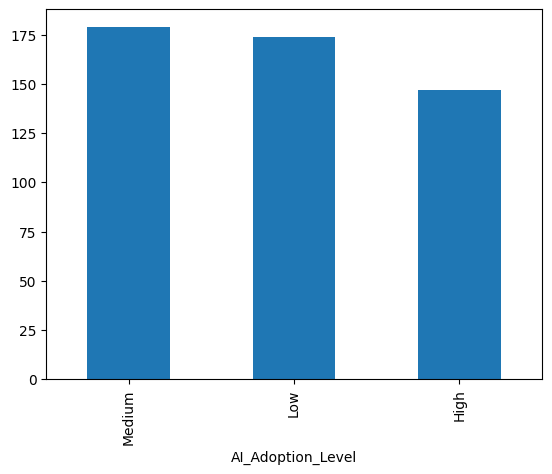

*********************************************************************
                               Automation_Risk


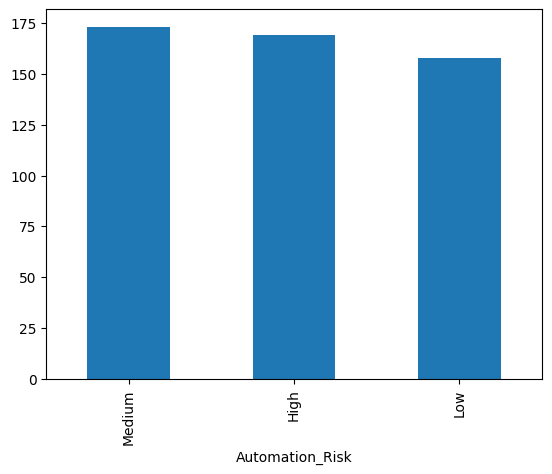

*********************************************************************
                               Required_Skills


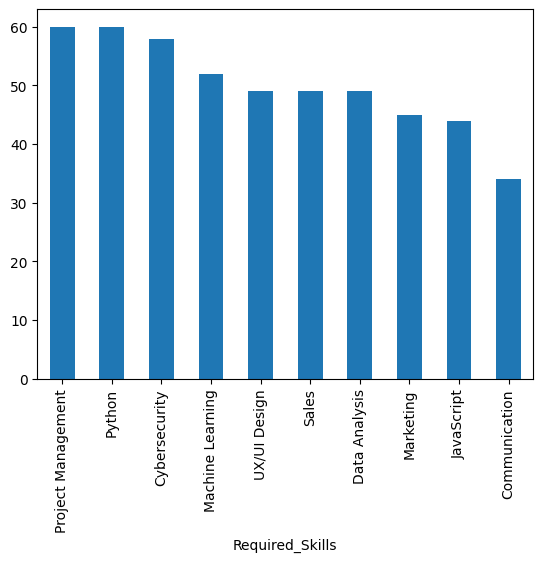

*********************************************************************
*********************************************************************
                               Remote_Friendly


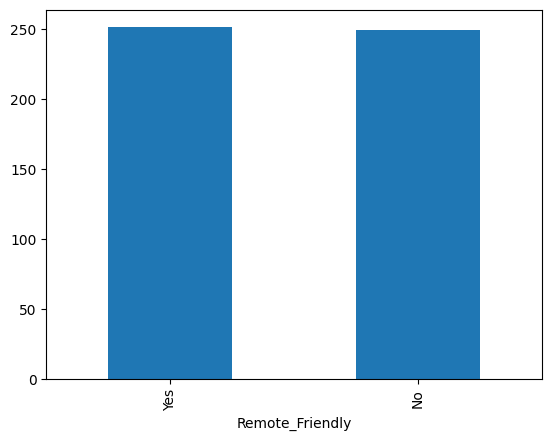

*********************************************************************
                               Job_Growth_Projection


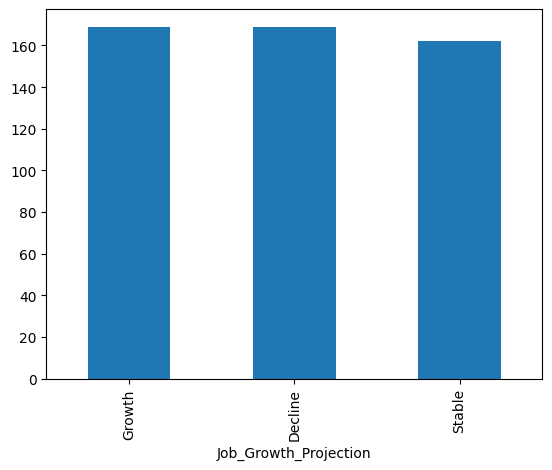

*********************************************************************


In [478]:
for i in df.columns:
    if i != "Salary_USD":
        print("                               "+i)
        df[i].value_counts().plot(kind="bar")
        plt.show()
    print("*********************************************************************")    

### Job Title Frequency Counts

In [479]:
df["Job_Title"].value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

### Pie Chart of Job Title Distribution

In [482]:
types = df["Job_Title"].value_counts().reset_index()
types.columns = ['Job_Title', 'count'] 

fig = px.pie(types, values='count', names='Job_Title', title='Distribution of Job Title')
fig.show()


### Industry Frequency Counts

In [481]:
I=df["Industry"].value_counts()
print(I)


Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64


### Cross-Tabulation of Job Titles and Industries

In [349]:
pd.crosstab(df["Job_Title"],df["Industry"])

Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Job_Title,,,,,,,,,,
AI Researcher,7,5,3,7,2,6,6,6,2,7
Cybersecurity Analyst,7,5,8,2,8,6,3,6,7,3
Data Scientist,8,5,8,4,3,6,3,10,10,5
HR Manager,6,7,6,11,2,6,6,5,6,2
Marketing Specialist,4,6,3,6,5,6,9,5,3,1
Operations Manager,4,5,6,4,6,3,1,8,3,4
Product Manager,5,4,3,7,3,3,1,4,5,4
Sales Manager,4,5,3,6,4,9,5,3,5,5
Software Engineer,2,1,3,3,4,6,5,5,7,5


### Bar Chart of Job Titles and Industry Distribution

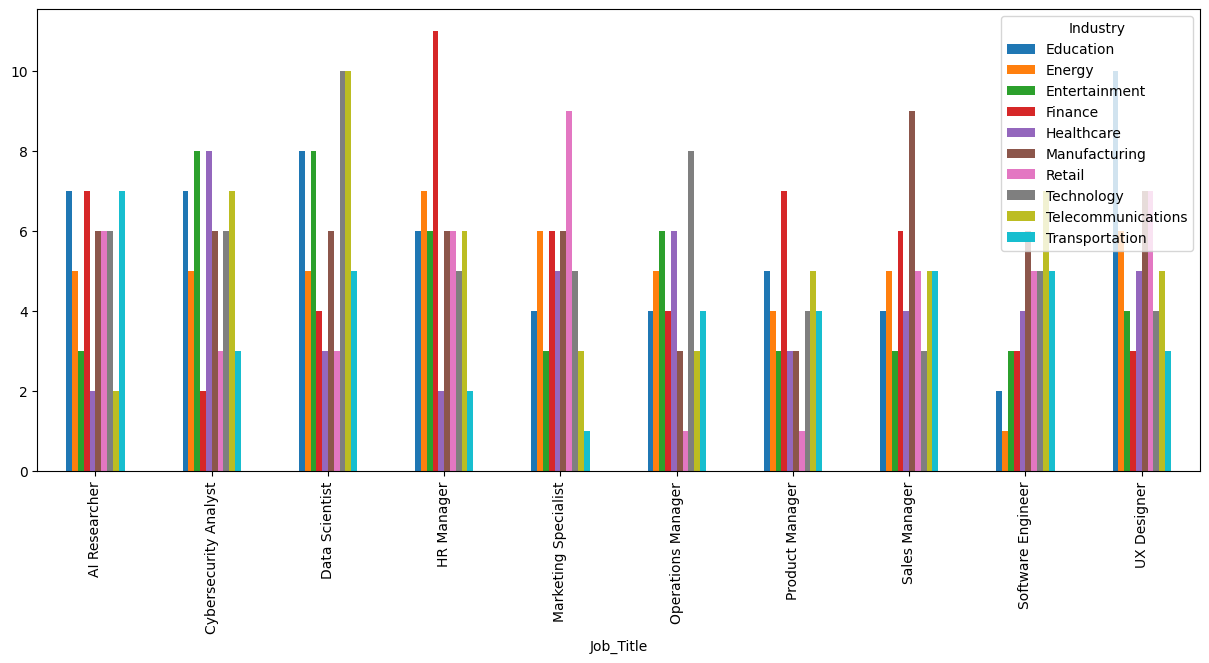

In [350]:
pd.crosstab(df["Job_Title"],df["Industry"]).plot(kind="bar",figsize=(15,6))
plt.show()

### Count of Each Required Skill

In [351]:
R=df["Required_Skills"].value_counts()
print(R)


Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Sales                 49
Data Analysis         49
Marketing             45
JavaScript            44
Communication         34
Name: count, dtype: int64


### Cross-Tabulation of Job Titles and Required Skills

In [352]:
pd.crosstab(df["Job_Title"],df["Required_Skills"])

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Job_Title,,,,,,,,,,
AI Researcher,4,5,4,9,2,4,3,9,7,4
Cybersecurity Analyst,3,10,3,4,7,5,5,5,4,9
Data Scientist,2,9,7,3,6,5,7,9,8,6
HR Manager,4,6,7,5,10,5,6,3,6,5
Marketing Specialist,6,3,4,4,1,8,2,10,6,4
Operations Manager,5,5,3,5,4,1,5,5,5,6
Product Manager,2,2,2,5,7,3,6,5,2,5
Sales Manager,1,8,9,2,7,2,7,6,4,3
Software Engineer,4,2,5,3,6,5,5,3,4,4


### Bar Chart of Job Titles and Required Skills Distribution

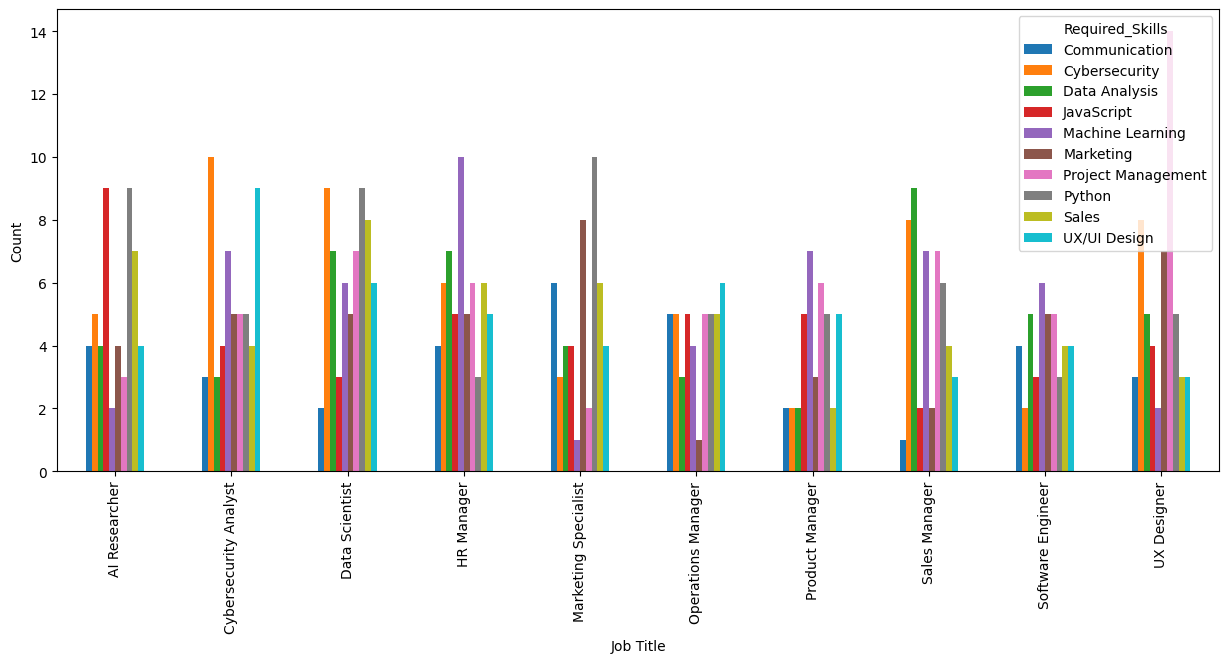

In [353]:
pd.crosstab(df["Job_Title"],df["Required_Skills"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()


### Company Size Frequency Counts

In [354]:
C=df["Company_Size"].value_counts()
print(C)


Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64


### Cross-Tabulation of Job Titles and Company Sizes

In [355]:
pd.crosstab(df["Job_Title"],df["Company_Size"])

Company_Size,Large,Medium,Small
Job_Title,,,
AI Researcher,16,21,14
Cybersecurity Analyst,20,16,19
Data Scientist,23,17,22
HR Manager,20,20,17
Marketing Specialist,15,20,13
Operations Manager,13,12,19
Product Manager,16,11,12
Sales Manager,16,16,17
Software Engineer,12,13,16


### Bar Chart of Job Titles and Company Sizes Distribution

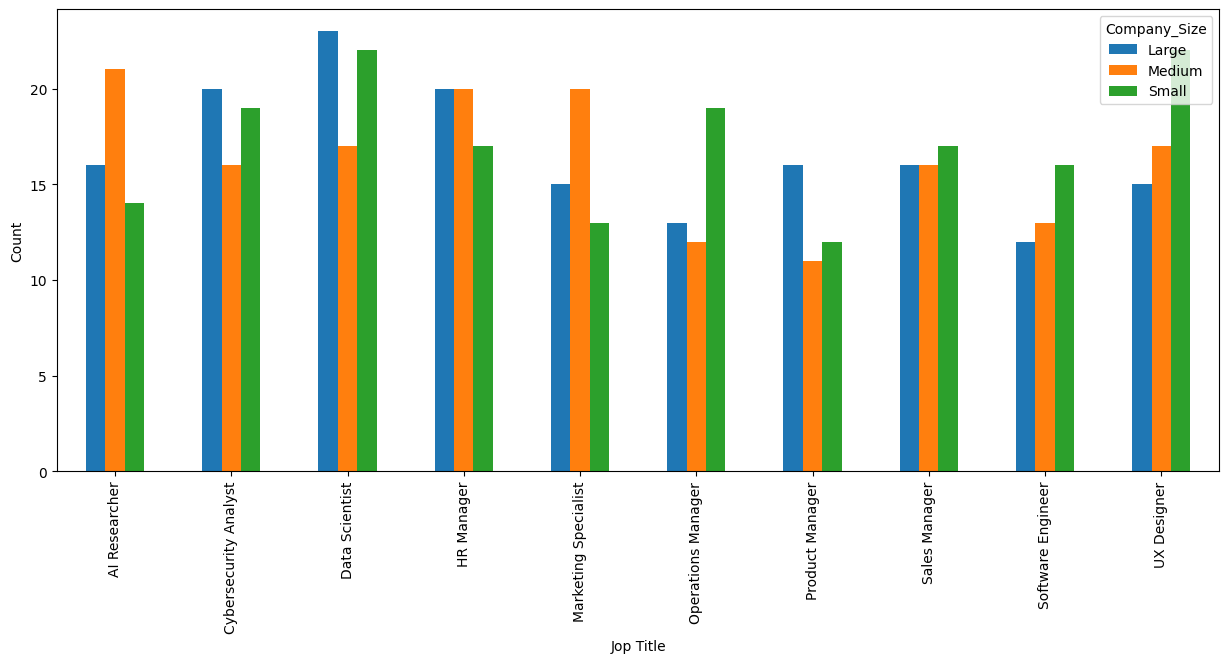

In [356]:
pd.crosstab(df["Job_Title"],df["Company_Size"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Jop Title")
plt.ylabel("Count")
plt.show()

### AI Adoption Level Frequency Counts

In [357]:
K=df["AI_Adoption_Level"].value_counts()
print(K)


AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype: int64


### Cross-Tabulation of Job Titles and AI Adoption Levels

In [358]:
pd.crosstab(df["Job_Title"],df["AI_Adoption_Level"])

AI_Adoption_Level,High,Low,Medium
Job_Title,,,
AI Researcher,15,18,18
Cybersecurity Analyst,15,19,21
Data Scientist,21,22,19
HR Manager,14,18,25
Marketing Specialist,16,15,17
Operations Manager,8,17,19
Product Manager,14,13,12
Sales Manager,16,16,17
Software Engineer,13,15,13


### Bar Plot of Job Title and AI Adoption Levels Counts

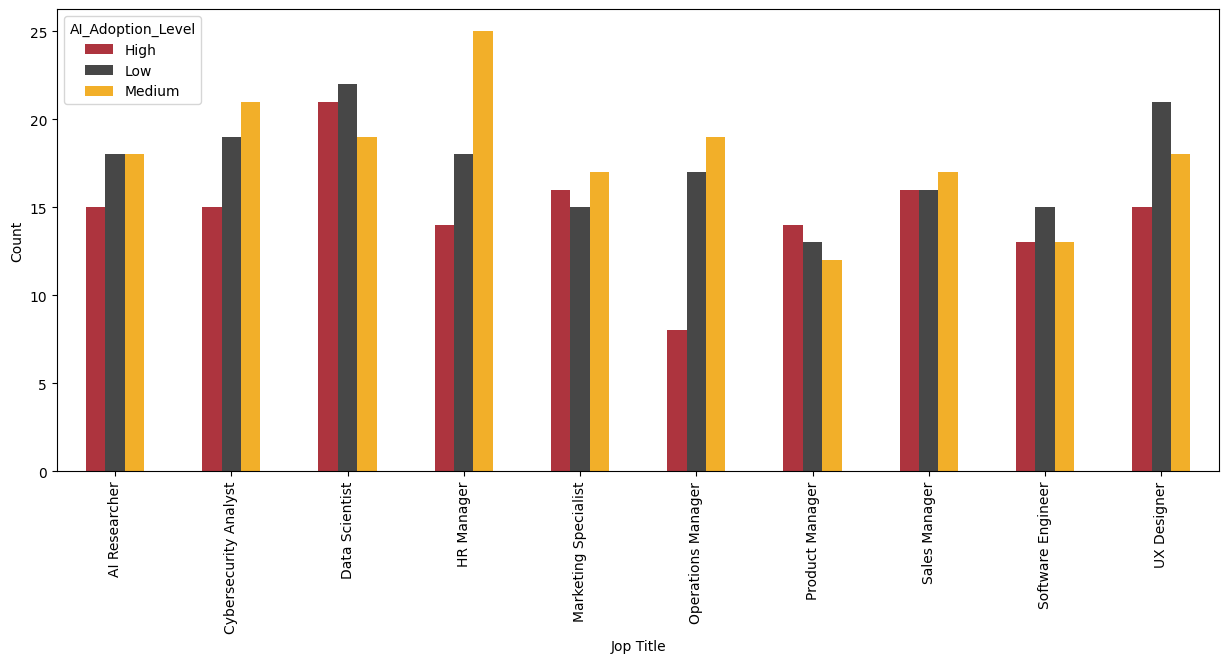

In [359]:
pd.crosstab(df["Job_Title"],df["AI_Adoption_Level"]).plot(kind="bar",figsize=(15,6), color=['#ad343e' , '#474747' , '#f2af29'])
plt.xlabel("Jop Title")
plt.ylabel("Count")
plt.show()

### Automation Risk Frequency Counts

In [360]:
a=df["Automation_Risk"].value_counts()
print(a)


Automation_Risk
Medium    173
High      169
Low       158
Name: count, dtype: int64


### Job Title and Automation Risk Distribution Crosstab

In [361]:
pd.crosstab(df["Job_Title"],df["Automation_Risk"])

Automation_Risk,High,Low,Medium
Job_Title,,,
AI Researcher,20,15,16
Cybersecurity Analyst,23,21,11
Data Scientist,17,25,20
HR Manager,15,16,26
Marketing Specialist,17,10,21
Operations Manager,10,18,16
Product Manager,16,12,11
Sales Manager,20,18,11
Software Engineer,15,13,13


### Distribution of Automation Risk Levels by Job Title: Bar Chart

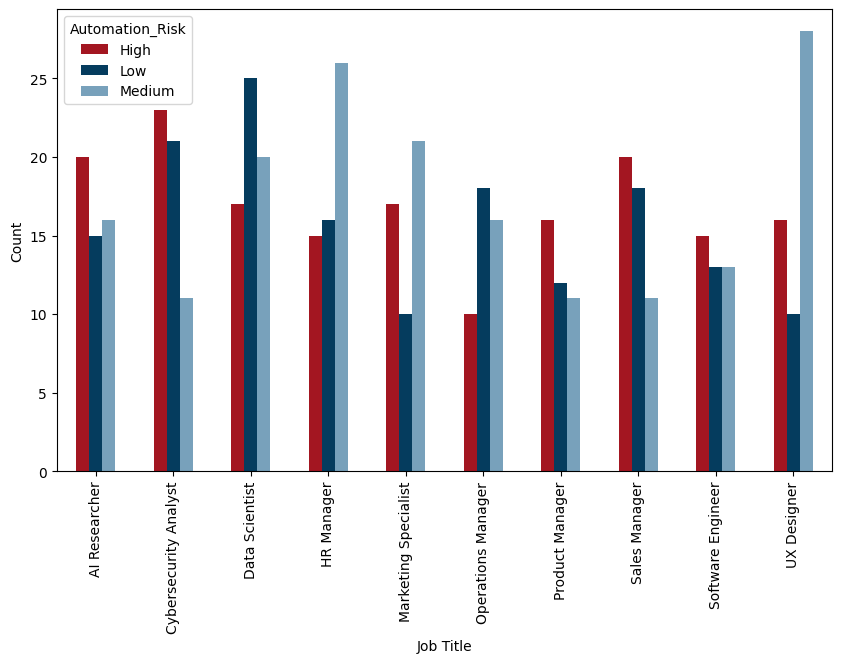

In [362]:
pd.crosstab(df["Job_Title"],df["Automation_Risk"]).plot(kind="bar", figsize=(10,6) ,color=['#a31621','#053c5e','#78a1bb'] )
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

### Job Growth Projection Occurrence Summary

In [363]:
z=df["Job_Growth_Projection"].value_counts()
print(z)


Job_Growth_Projection
Growth     169
Decline    169
Stable     162
Name: count, dtype: int64


### Job Title vs. Job Growth Projection Frequency Matrix

In [364]:
pd.crosstab(df["Job_Title"],df["Job_Growth_Projection"])

Job_Growth_Projection,Decline,Growth,Stable
Job_Title,,,
AI Researcher,16,20,15
Cybersecurity Analyst,19,14,22
Data Scientist,23,22,17
HR Manager,22,14,21
Marketing Specialist,23,11,14
Operations Manager,7,19,18
Product Manager,10,15,14
Sales Manager,16,19,14
Software Engineer,12,16,13


### Distribution of Job Growth Projections by Job Title: Bar Chart

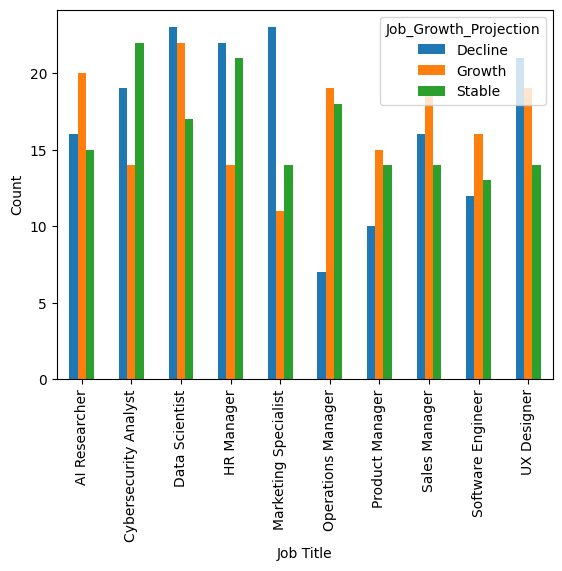

In [365]:
pd.crosstab(df["Job_Title"],df["Job_Growth_Projection"]).plot(kind="bar")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

### Frequency of Remote-Friendly Status

In [366]:
q=df["Remote_Friendly"].value_counts()
print(q)


Remote_Friendly
Yes    251
No     249
Name: count, dtype: int64


### Mean Salary for Each Job Title, Sorted in Descending Order

In [367]:
df.groupby('Job_Title').Salary_USD.mean().sort_values(ascending=False)

Job_Title
Operations Manager       96937.230841
AI Researcher            95583.346966
Sales Manager            92926.644659
Data Scientist           91480.756134
Marketing Specialist     90961.147148
Product Manager          90802.642422
UX Designer              90157.291938
Cybersecurity Analyst    89429.064689
HR Manager               89251.780747
Software Engineer        84490.542038
Name: Salary_USD, dtype: float64

### Box Plot Showing Salary Ranges for Each Job Title

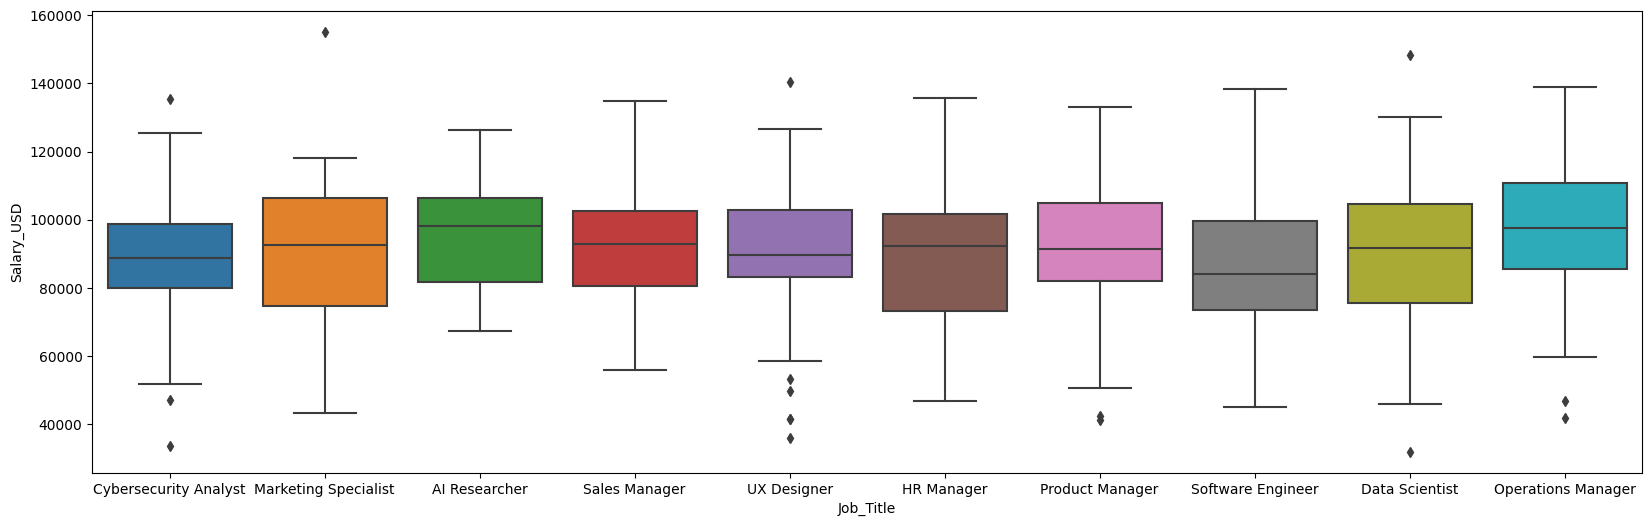

In [368]:
df.groupby('Job_Title').Salary_USD.mean()
plt.subplots(figsize=(20,6))
sns.boxplot(data=df,x="Job_Title",y="Salary_USD")
plt.show()

### Count of Each Location

In [369]:
df["Location"].value_counts()

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

### Job Title and Location Distribution Crosstab

In [370]:
pd.crosstab(df["Job_Title"],df["Location"])

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


### Distribution of Locations by Job Title: Bar Chart

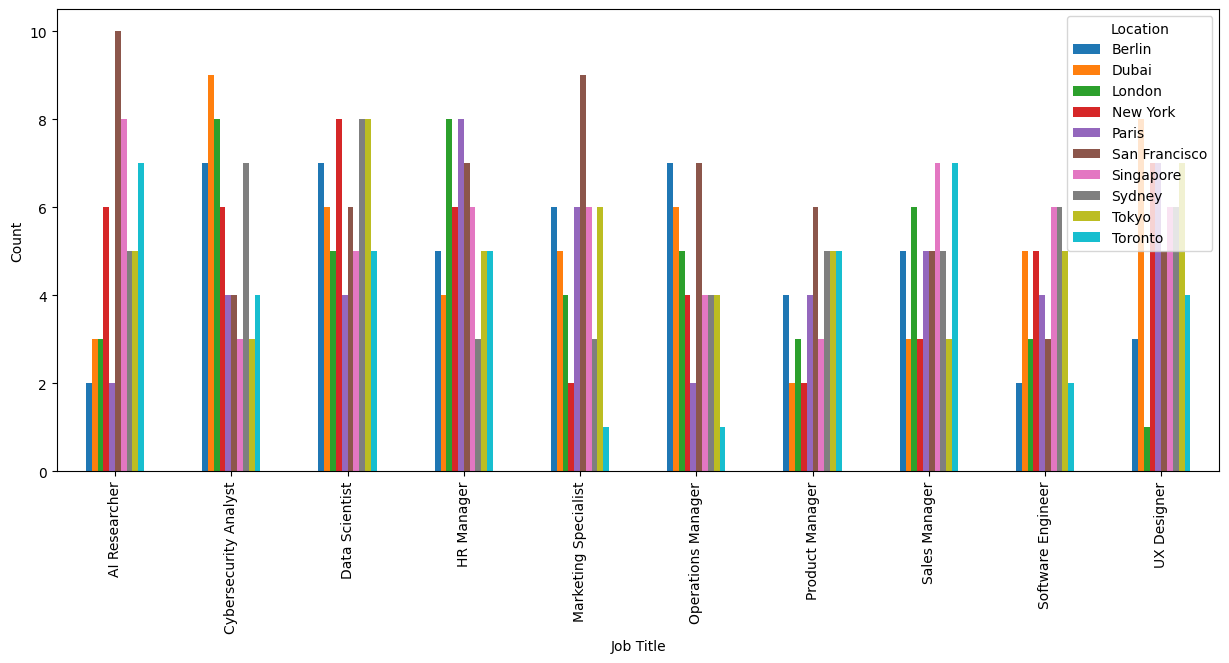

In [371]:
pd.crosstab(df["Job_Title"],df["Location"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()


### Pie Chart of Mean Salaries by Industry

Industry
Finance               94355.465599
Entertainment         94291.233910
Education             93798.521907
Energy                92763.939416
Healthcare            91688.504404
Retail                91232.897408
Technology            91204.011373
Telecommunications    90418.304458
Manufacturing         86590.003715
Transportation        85058.296977
Name: Salary_USD, dtype: float64
*********************************************************************


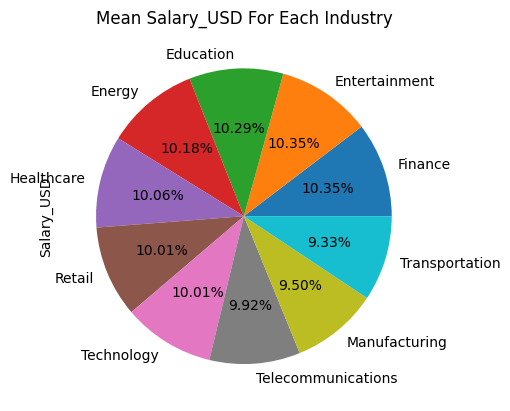

In [372]:
o=df.groupby('Industry').Salary_USD.mean().sort_values(ascending=False)
print(o)
print("*********************************************************************")
o.plot(kind="pie",autopct="%0.2f%%")
plt.title("Mean Salary_USD For Each Industry")
plt.show()

### Industry and Location Distribution Crosstab

In [483]:
pd.crosstab(df["Industry"],df["Location"])

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


### Industry and Location Crosstab Bar Plot

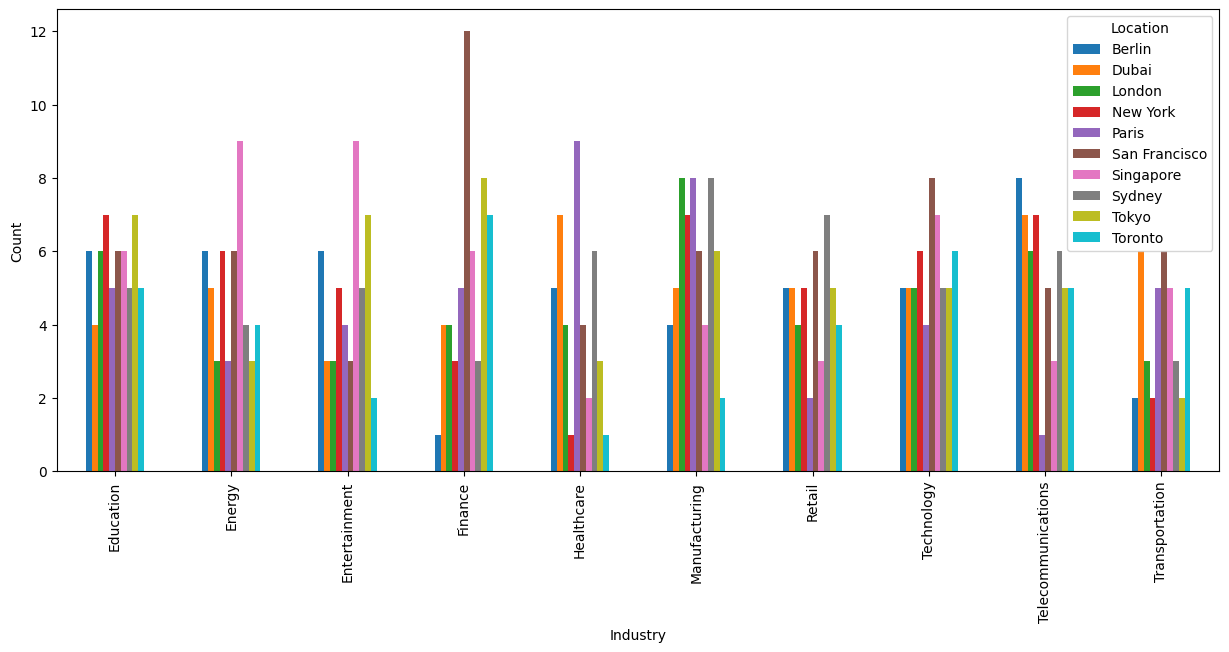

In [374]:
pd.crosstab(df["Industry"],df["Location"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Industry and Company Size Count Matrix

In [375]:
pd.crosstab(df["Industry"],df["Company_Size"])

Company_Size,Large,Medium,Small
Industry,,,
Education,16,22,19
Energy,16,15,18
Entertainment,14,13,20
Finance,15,23,15
Healthcare,20,10,12
Manufacturing,20,17,21
Retail,14,19,13
Technology,22,17,17
Telecommunications,16,16,21


### Bar Chart of Industry and Company Size Distribution

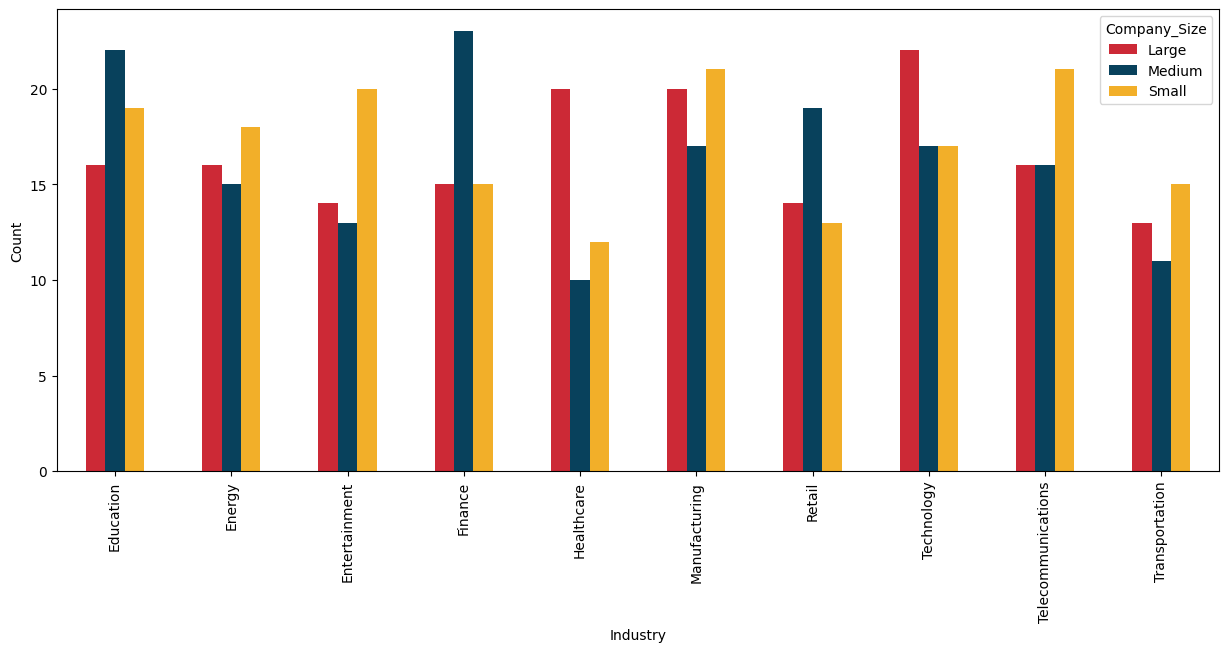

In [376]:
pd.crosstab(df["Industry"],df["Company_Size"]).plot(kind="bar",figsize=(15,6),color=[ '#cc2936' , '#08415c' , '#f2af29'] )
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of Industries and AI Adoption Levels

In [377]:
pd.crosstab(df["Industry"],df["AI_Adoption_Level"])

AI_Adoption_Level,High,Low,Medium
Industry,,,
Education,16,23,18
Energy,15,20,14
Entertainment,13,17,17
Finance,15,19,19
Healthcare,17,10,15
Manufacturing,17,18,23
Retail,14,13,19
Technology,13,16,27
Telecommunications,15,22,16


### Bar Plot of Industry and AI Adoption Level Counts

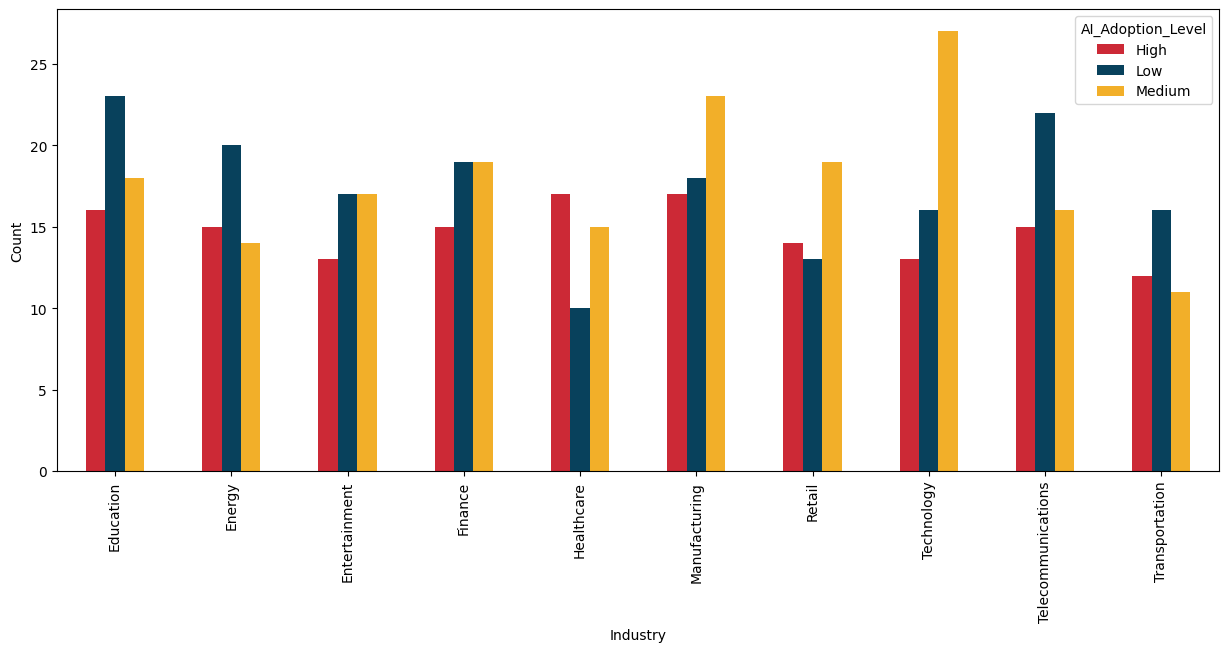

In [378]:
pd.crosstab(df["Industry"],df["AI_Adoption_Level"]).plot(kind="bar",figsize=(15,6),color=[ '#cc2936' , '#08415c' , '#f2af29'] )
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Cross-Tab Analysis of Industries and Automation Risk Levels

In [379]:
pd.crosstab(df["Industry"],df["Automation_Risk"])

Automation_Risk,High,Low,Medium
Industry,,,
Education,22,16,19
Energy,17,18,14
Entertainment,18,17,12
Finance,17,16,20
Healthcare,11,14,17
Manufacturing,19,16,23
Retail,11,16,19
Technology,17,17,22
Telecommunications,18,17,18


### Bar Chart of Industry and Automation Risk Level Distribution

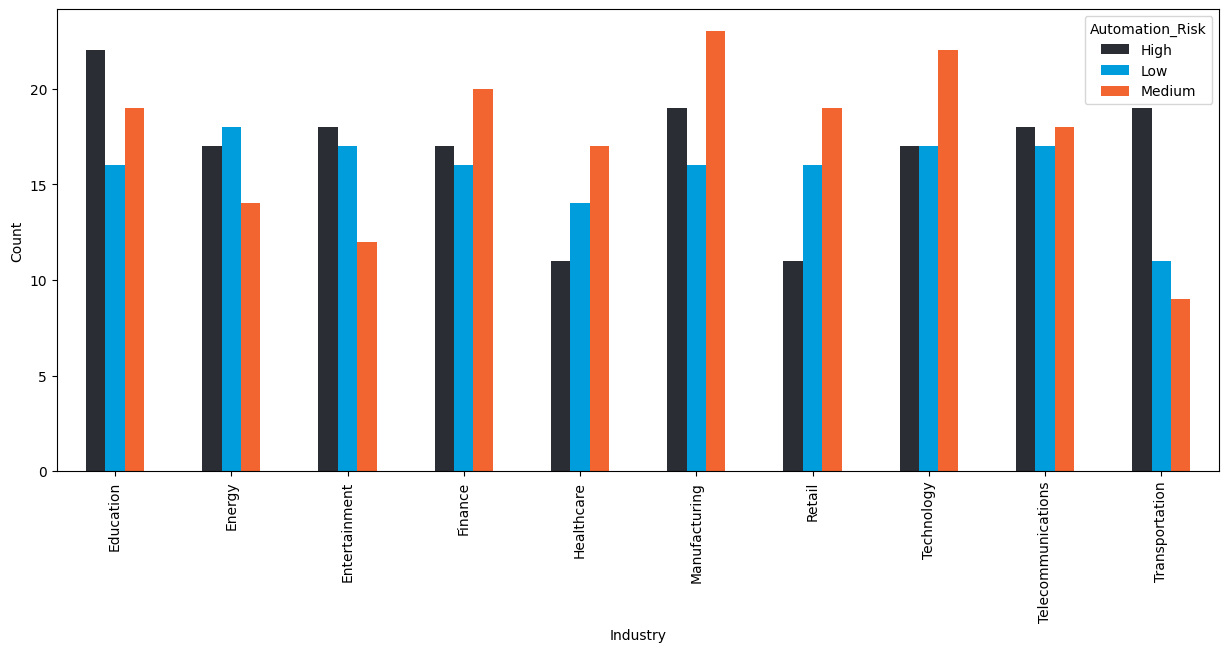

In [380]:
pd.crosstab(df["Industry"],df["Automation_Risk"]).plot(kind="bar",figsize=(15,6), color=['#2a2d34' , '#009ddc' , '#f26430'])
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of Industries and Required Skills

In [381]:
pd.crosstab(df["Industry"],df["Required_Skills"])


Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Industry,,,,,,,,,,
Education,5,9,9,4,7,3,10,4,4,2
Energy,2,5,6,4,6,3,3,5,6,9
Entertainment,3,8,2,6,4,7,6,4,4,3
Finance,2,8,2,6,8,1,6,9,5,6
Healthcare,5,2,5,5,5,3,4,8,2,3
Manufacturing,7,7,4,3,6,8,8,8,4,3
Retail,3,9,5,5,6,3,5,3,2,5
Technology,1,4,5,5,4,10,4,6,9,8
Telecommunications,3,4,7,3,5,6,9,5,6,5


### Visualizing Industry vs. Required Skills with Bar Chart

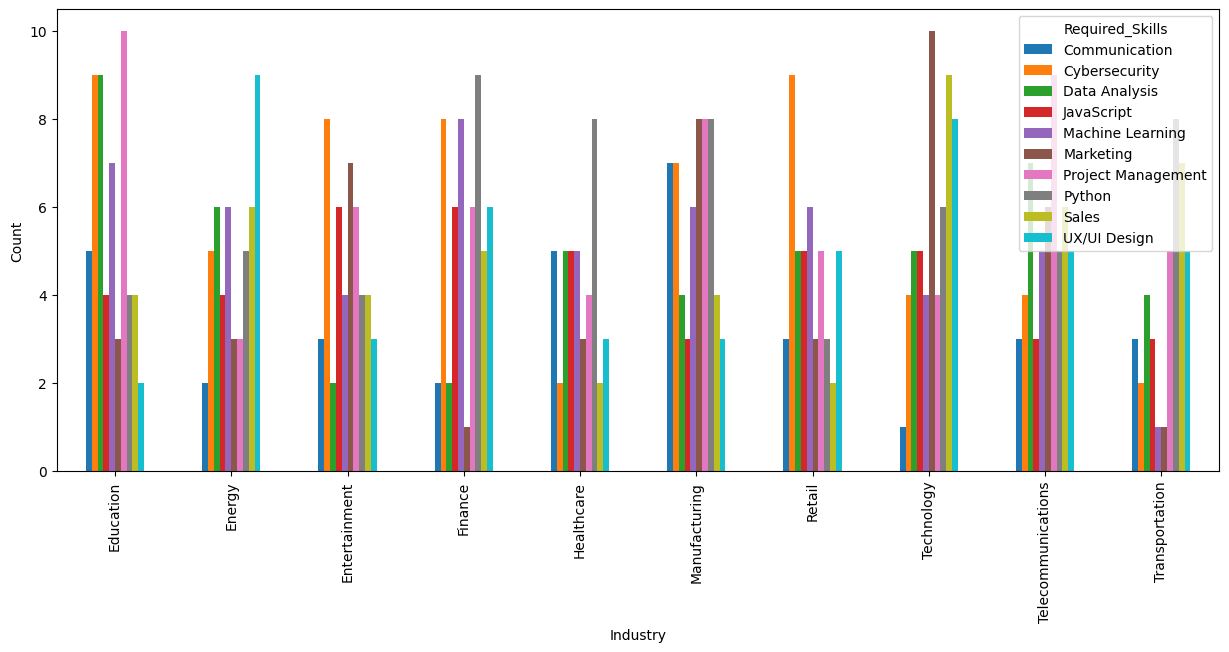

In [382]:
pd.crosstab(df["Industry"],df["Required_Skills"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Industry and Remote-Friendly Status Count Matrix

In [383]:
pd.crosstab(df["Industry"],df["Remote_Friendly"])

Remote_Friendly,No,Yes
Industry,,
Education,28,29
Energy,22,27
Entertainment,19,28
Finance,26,27
Healthcare,18,24
Manufacturing,33,25
Retail,26,20
Technology,31,25
Telecommunications,27,26


### Bar Plot of Industry and Remote-Friendly Status Counts

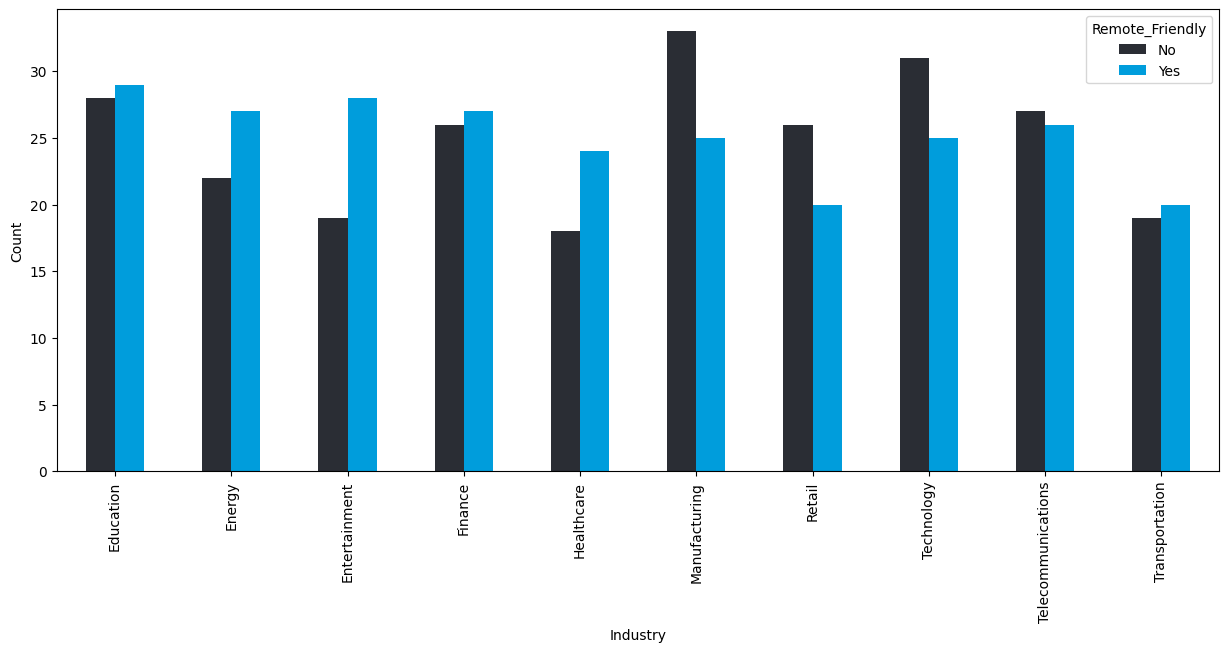

In [384]:
pd.crosstab(df["Industry"],df["Remote_Friendly"]).plot(kind="bar",figsize=(15,6), color=['#2a2d34' , '#009ddc' ])
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Cross-Tab Analysis of Industries and Job Growth Projections

In [385]:
pd.crosstab(df["Industry"],df["Job_Growth_Projection"])

Job_Growth_Projection,Decline,Growth,Stable
Industry,,,
Education,16,24,17
Energy,20,12,17
Entertainment,18,17,12
Finance,15,23,15
Healthcare,13,15,14
Manufacturing,27,20,11
Retail,19,9,18
Technology,19,18,19
Telecommunications,12,17,24


### Visualizing Industry vs. Job Growth Projections with Bar Chart

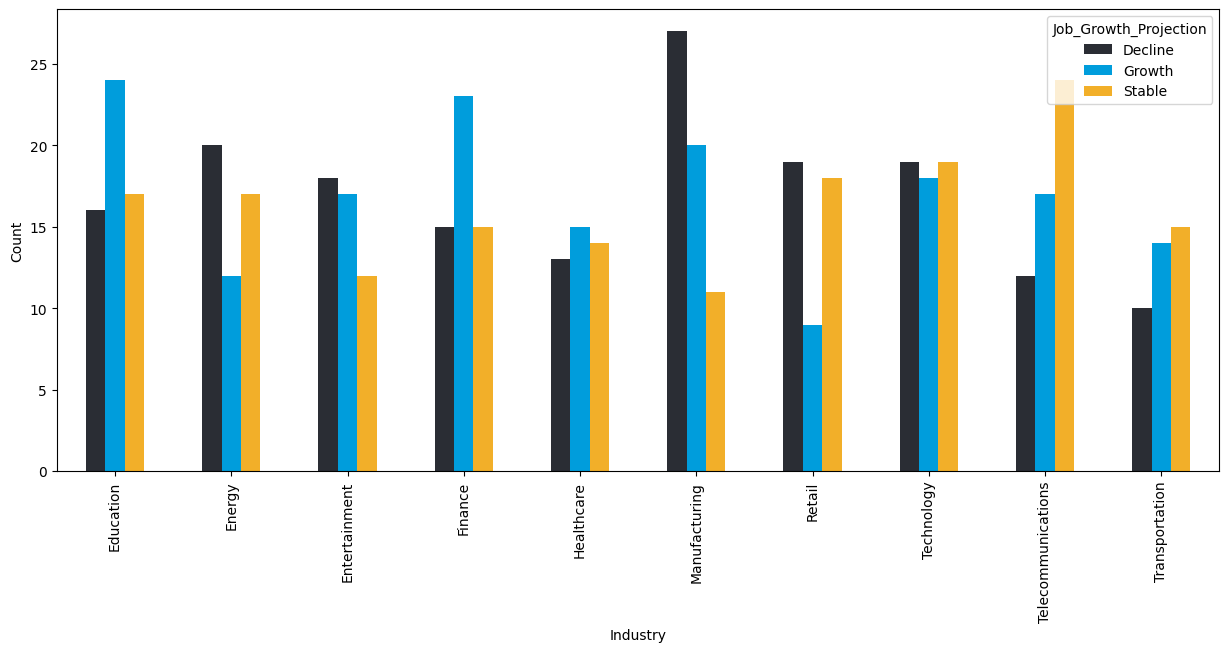

In [386]:
pd.crosstab(df["Industry"],df["Job_Growth_Projection"]).plot(kind="bar",figsize=(15,6), color=['#2a2d34' , '#009ddc' ,'#f2af29'])
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()

### Company Size and Location Distribution Crosstab

In [387]:
pd.crosstab(df["Company_Size"],df["Location"])

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Company_Size,,,,,,,,,,
Large,18,13,14,19,15,18,17,14,19,19
Medium,19,17,15,11,14,19,20,20,14,14
Small,11,21,17,19,17,25,17,18,18,8


### Bar Plot of Company Size and Location Counts

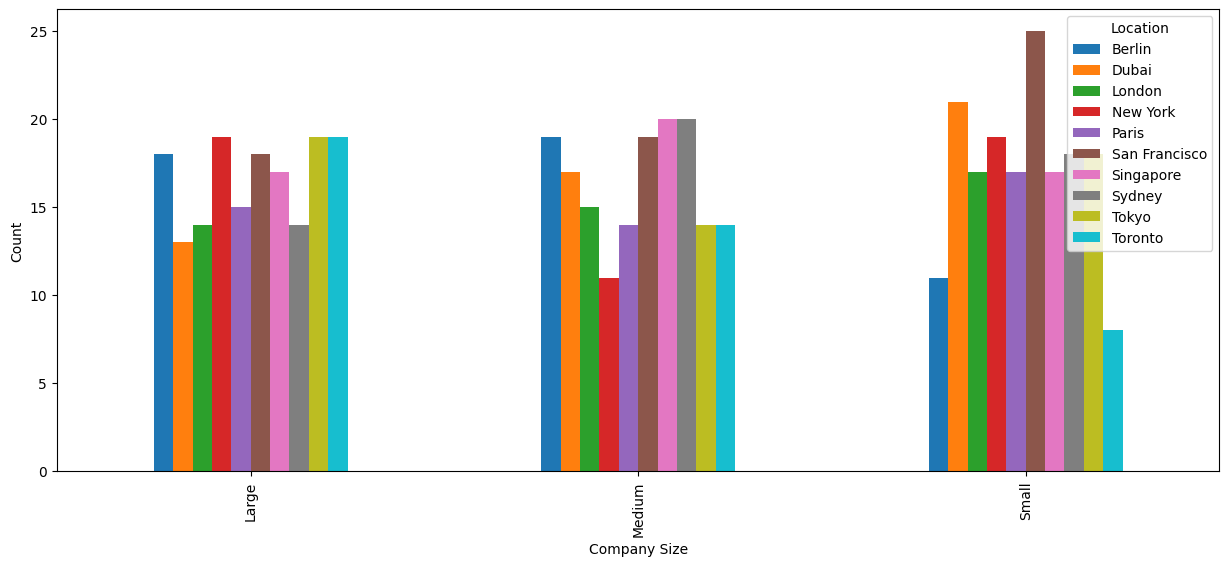

In [388]:
pd.crosstab(df["Company_Size"],df["Location"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()


### Company Size and AI Adoption Level Distribution Crosstab

In [389]:
pd.crosstab(df["Company_Size"],df["AI_Adoption_Level"])

AI_Adoption_Level,High,Low,Medium
Company_Size,,,
Large,47,54,65
Medium,42,61,60
Small,58,59,54


### Distribution of AI Adoption Levels by Company Size: Bar Chart

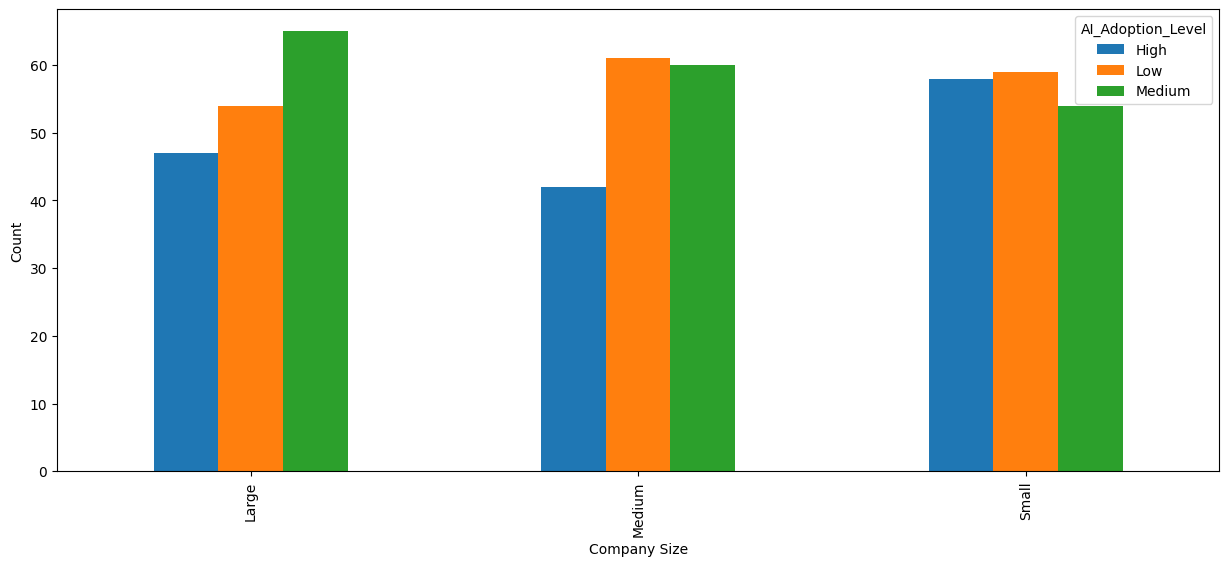

In [390]:
pd.crosstab(df["Company_Size"],df["AI_Adoption_Level"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()


### Company Size and Automation Risk Level Count Matrix

In [391]:
pd.crosstab(df["Company_Size"],df["Automation_Risk"])

Automation_Risk,High,Low,Medium
Company_Size,,,
Large,58,42,66
Medium,52,63,48
Small,59,53,59


### Bar Plot of Company Size and AI Adoption Level Counts

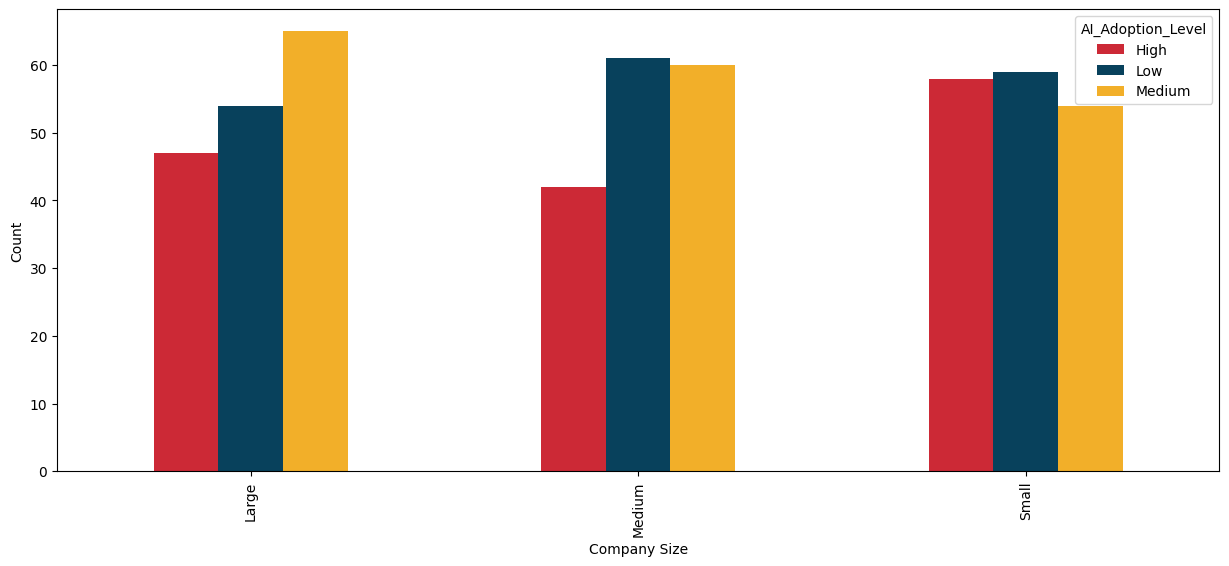

In [392]:
pd.crosstab(df["Company_Size"],df["AI_Adoption_Level"]).plot(kind="bar",figsize=(15,6),color=['#cc2936','#08415c', '#f2af29'])
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

### Company Size vs. Automation Risk Frequency Matrix

In [393]:
pd.crosstab(df["Company_Size"],df["Automation_Risk"])

Automation_Risk,High,Low,Medium
Company_Size,,,
Large,58,42,66
Medium,52,63,48
Small,59,53,59


### Company Size and Automation Risk Crosstab Bar Plot

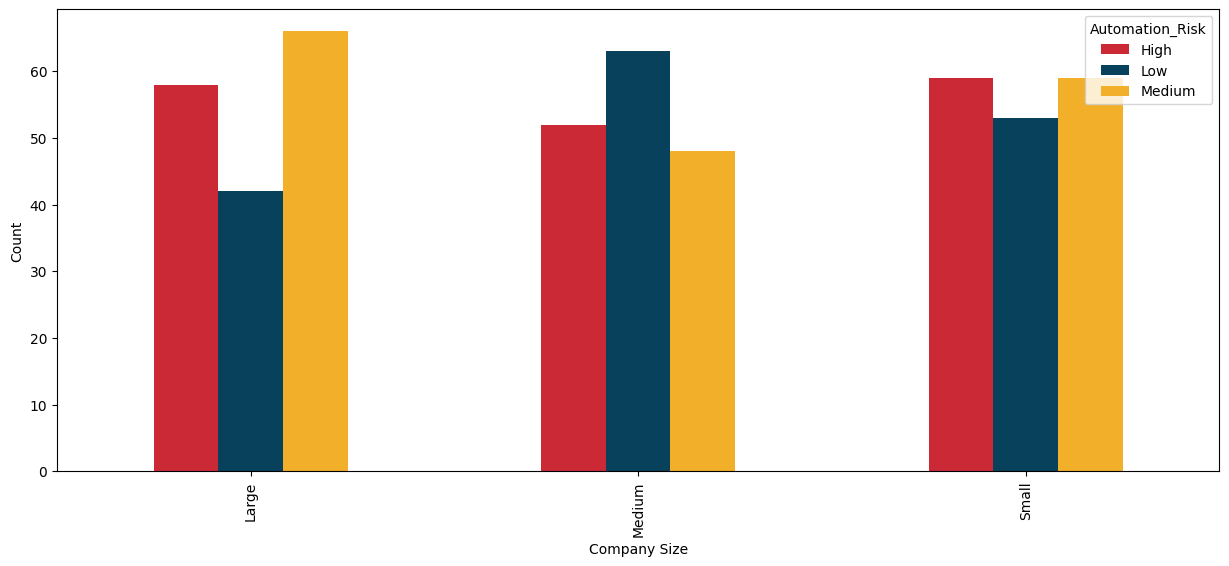

In [394]:
pd.crosstab(df["Company_Size"],df["Automation_Risk"]).plot(kind="bar",figsize=(15,6),color=['#cc2936','#08415c', '#f2af29'])
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of Company Size and Remote Work Friendliness

In [395]:
pd.crosstab(df["Company_Size"],df["Remote_Friendly"])

Remote_Friendly,No,Yes
Company_Size,,
Large,86,80
Medium,78,85
Small,85,86


### Bar Plot of Company Size vs. Remote Work Friendliness

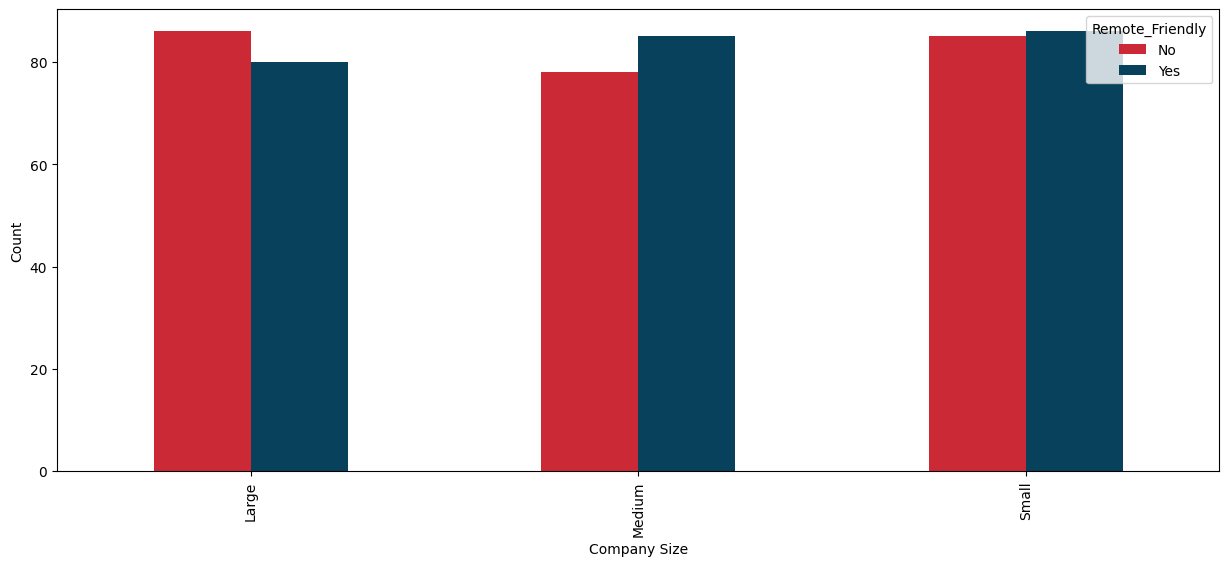

In [396]:
pd.crosstab(df["Company_Size"],df["Remote_Friendly"]).plot(kind="bar",figsize=(15,6),color=['#cc2936','#08415c'])
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of Company Size and Job Growth Projection

In [397]:
pd.crosstab(df["Company_Size"],df["Job_Growth_Projection"])

Job_Growth_Projection,Decline,Growth,Stable
Company_Size,,,
Large,47,59,60
Medium,57,47,59
Small,65,63,43


### Visualizing the Relationship Between Company Size and Remote Work Friendliness

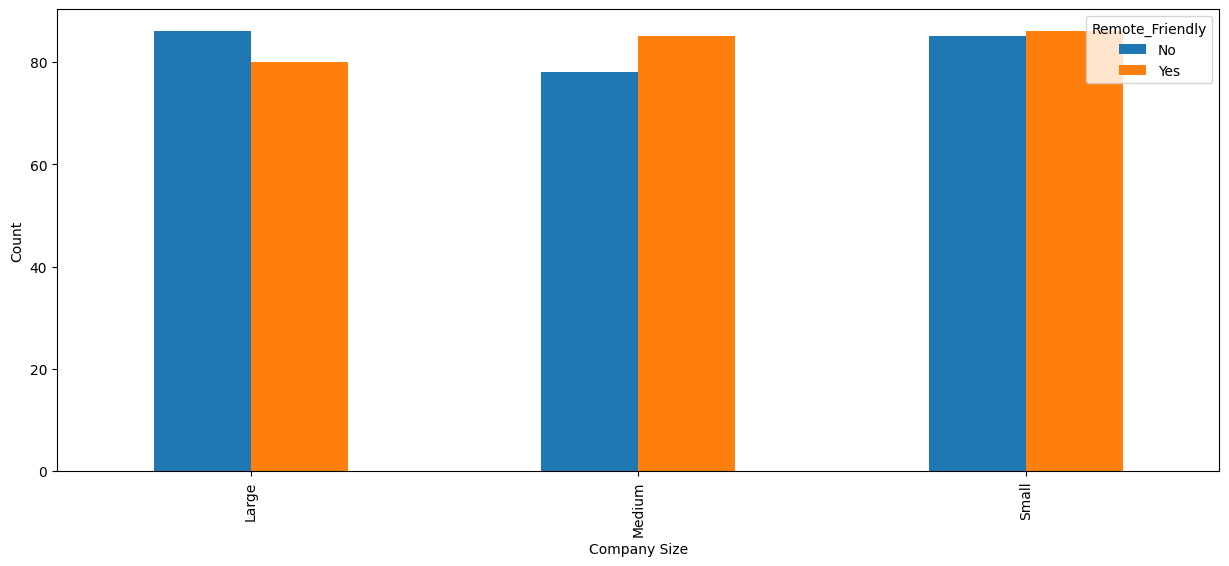

In [398]:
pd.crosstab(df["Company_Size"],df["Remote_Friendly"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

### Analysis of Average Salary by Location with Boxplot Visualization

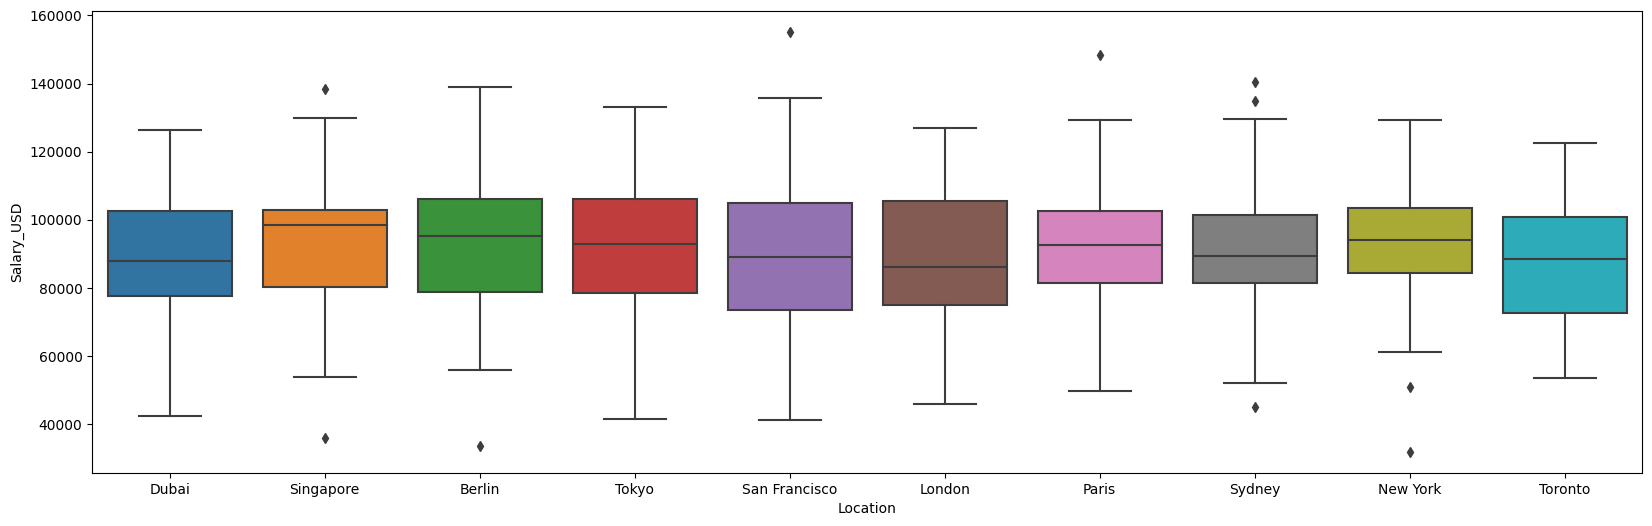

In [399]:
df.groupby('Location').Salary_USD.mean()
plt.subplots(figsize=(20,6))
sns.boxplot(data=df,x="Location",y="Salary_USD")
plt.show()

### Cross-Tabulation of Location and Remote Work Friendliness

In [400]:
pd.crosstab(df["Location"],df["Remote_Friendly"])

Remote_Friendly,No,Yes
Location,,
Berlin,27,21
Dubai,22,29
London,20,26
New York,25,24
Paris,18,28
San Francisco,31,31
Singapore,30,24
Sydney,32,20
Tokyo,24,27


### Bar Plot of Remote Work Friendliness by Location

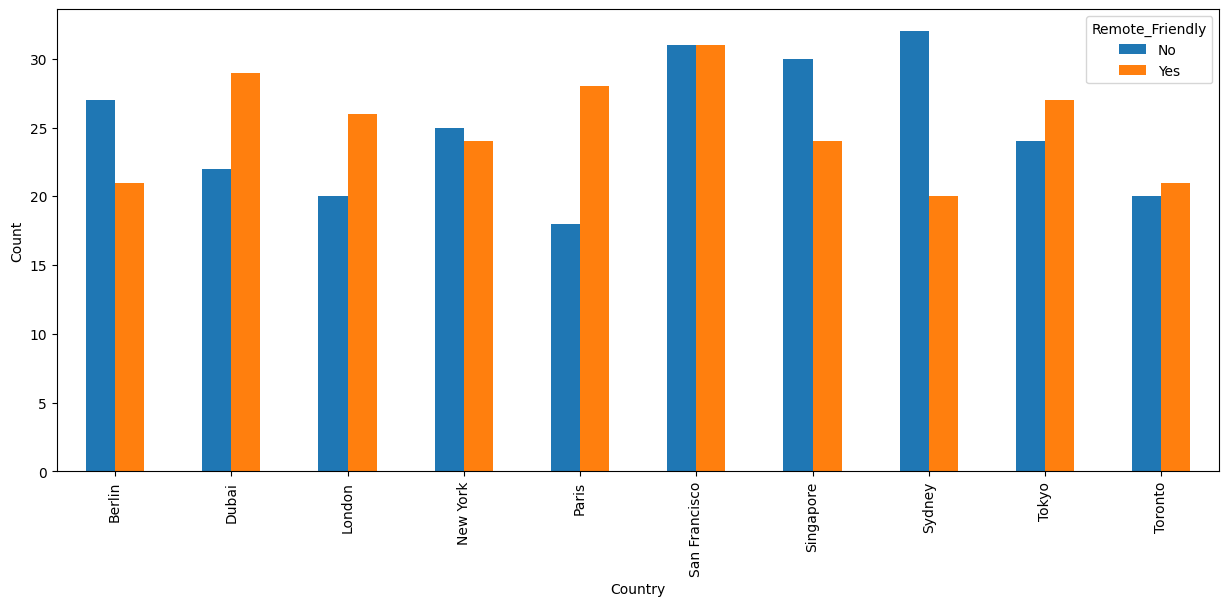

In [401]:
pd.crosstab(df["Location"],df["Remote_Friendly"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### Identifying the Most Common Location for Remote-Friendly Jobs

In [402]:
# Filter the dataset for "Remote_Friendly" equal to "Yes"
remote_friendly_df = df[df['Remote_Friendly'].str.lower() == 'yes']

# Find the most common location among remote-friendly jobs
most_common_location = remote_friendly_df['Location'].value_counts().idxmax()
most_common_location_count = remote_friendly_df['Location'].value_counts().max()

print(f"The most common location for remote-friendly jobs is {most_common_location} with {most_common_location_count} occurrences.")


The most common location for remote-friendly jobs is San Francisco with 31 occurrences.


### Cross-Tabulation of Location and Job Growth Projection

In [403]:
pd.crosstab(df["Location"],df["Job_Growth_Projection"])

Job_Growth_Projection,Decline,Growth,Stable
Location,,,
Berlin,17,18,13
Dubai,21,14,16
London,12,13,21
New York,12,19,18
Paris,20,9,17
San Francisco,22,21,19
Singapore,19,19,16
Sydney,17,19,16
Tokyo,16,22,13


### Bar Plot of Job Growth Projections by Location

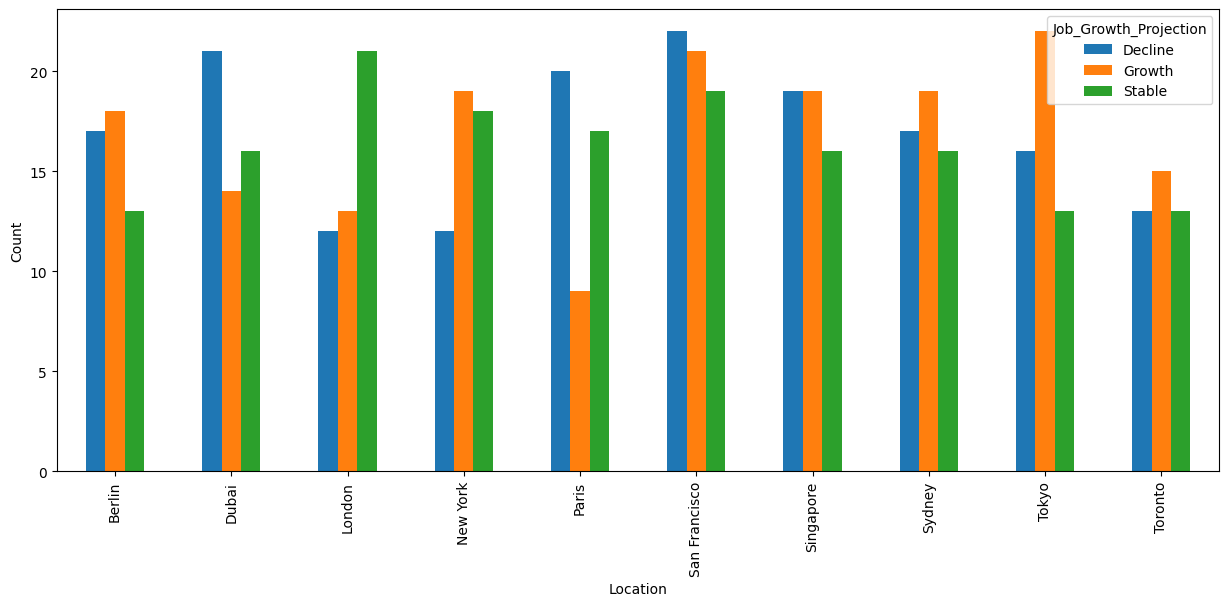

In [404]:
pd.crosstab(df["Location"],df["Job_Growth_Projection"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of Automation Risk and Job Growth Projection

In [405]:
pd.crosstab(df["Automation_Risk"],df["Job_Growth_Projection"])

Job_Growth_Projection,Decline,Growth,Stable
Automation_Risk,,,
High,55,63,51
Low,58,50,50
Medium,56,56,61


### Bar Plot of Job Growth Projections by Automation Risk

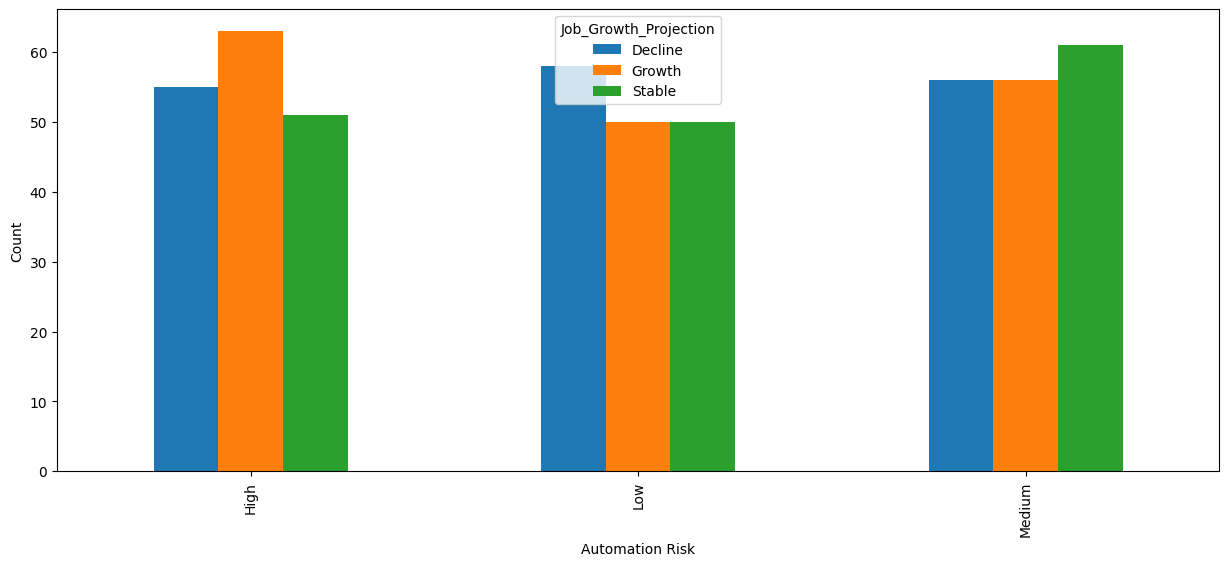

In [406]:
pd.crosstab(df["Automation_Risk"],df["Job_Growth_Projection"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("Automation Risk")
plt.ylabel("Count")
plt.show()

### Cross-Tabulation of AI Adoption Level and Required Skills

In [407]:
pd.crosstab(df["AI_Adoption_Level"],df["Required_Skills"])

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
AI_Adoption_Level,,,,,,,,,,
High,9,20,13,10,13,22,15,21,9,15
Low,12,17,14,17,17,13,26,24,17,17
Medium,13,21,22,17,22,10,19,15,23,17


### Bar Plot of Required Skills by AI Adoption Level

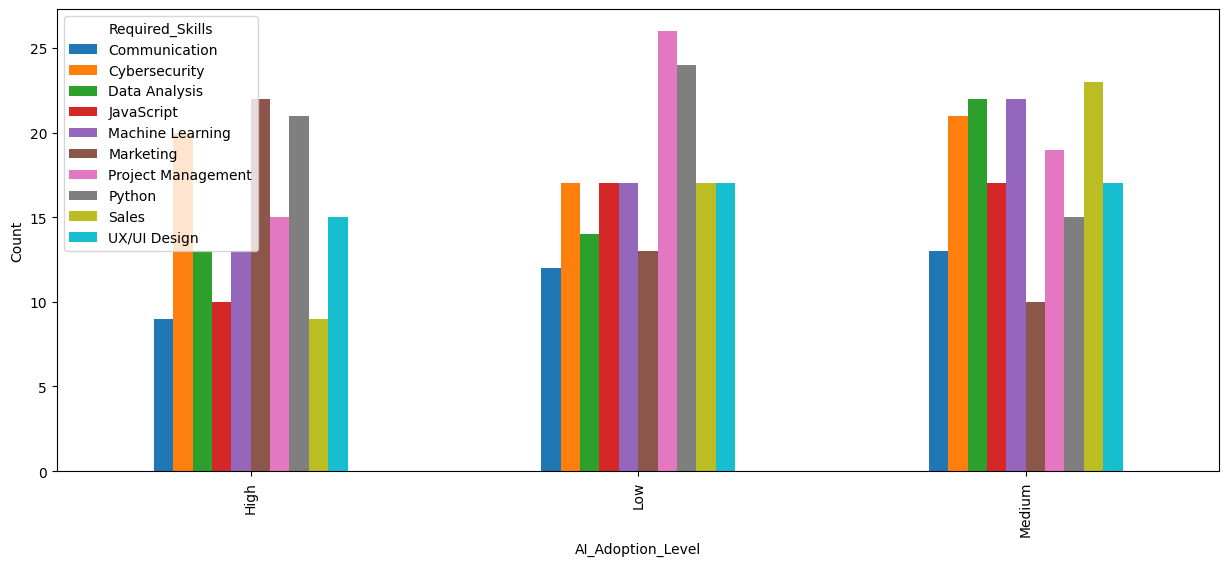

In [408]:
pd.crosstab(df["AI_Adoption_Level"],df["Required_Skills"]).plot(kind="bar",figsize=(15,6))
plt.xlabel("AI_Adoption_Level")
plt.ylabel("Count")
plt.show()

### Boxplot of Salary by Required Skills with Average Salary Analysis

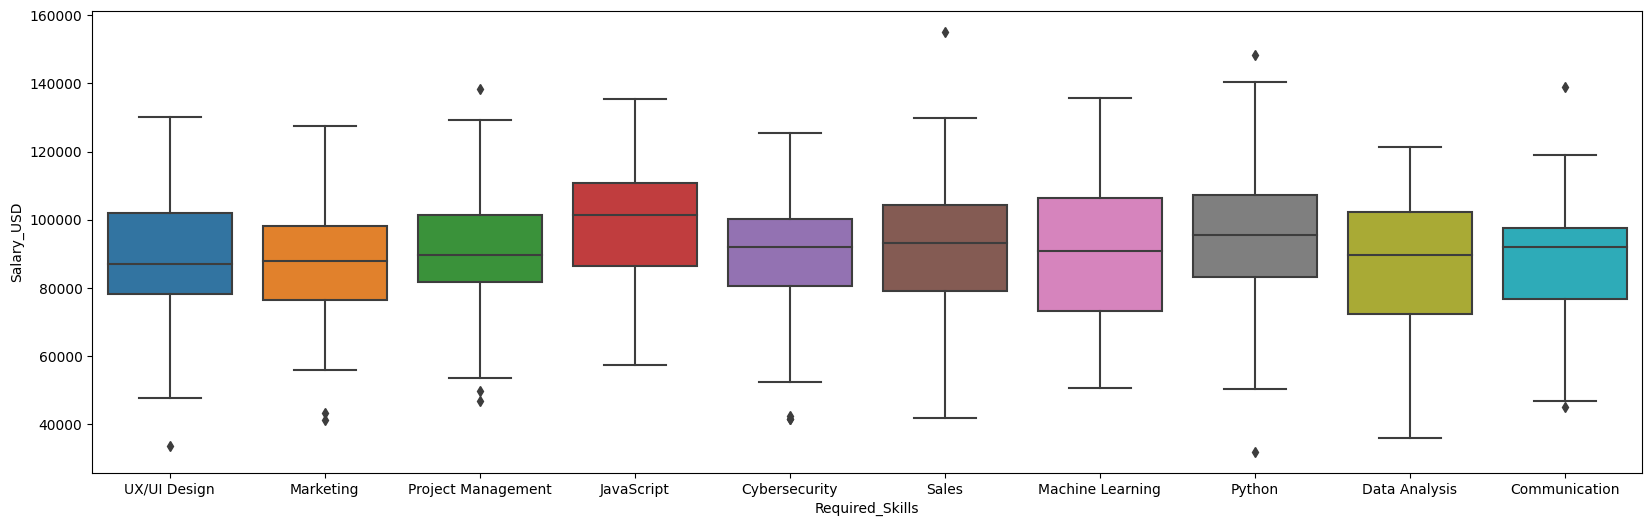

In [409]:
df.groupby('Required_Skills').Salary_USD.mean()
plt.subplots(figsize=(20,6))
sns.boxplot(data=df,x="Required_Skills",y="Salary_USD")
plt.show()

### Pairplot of Dataset Features

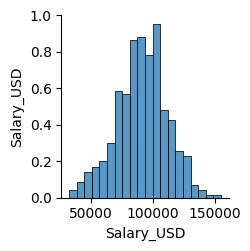

In [410]:
sns.pairplot(df)
plt.show()

# Data Preprocessing

### Initializing Label Encoder for Categorical Data Transformation

In [411]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

### Label Encoding Categorical Columns in DataFrame

In [412]:
for i in df.columns:
    if i != "Salary_USD":
        
        df[i]=la.fit_transform(df[i])

df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,1,2,2,1,2,0,9,111392.165243,1,1
1,4,7,0,6,2,0,5,93792.562466,0,0
2,0,7,0,6,2,0,9,107170.263069,1,1
3,7,6,2,0,1,0,6,93027.953758,0,1
4,1,2,2,8,1,1,3,87752.922171,1,0
...,...,...,...,...,...,...,...,...,...,...
495,2,8,1,0,1,2,4,105821.394046,1,2
496,1,8,2,2,1,0,9,119794.992146,0,0
497,1,1,0,1,0,1,9,79644.933099,1,2
498,5,4,0,4,0,1,7,77642.150625,1,2


### Correlation Matrix of DataFrame Features

In [413]:
cor=df.corr()
cor

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
Job_Title,1.000000,0.026491,0.055768,0.025033,-0.018646,0.045618,-0.025888,-0.048277,-0.053455,-0.006653
Industry,0.026491,1.000000,-0.015376,-0.026267,0.023490,0.011323,0.100402,-0.099517,-0.053076,0.064407
Company_Size,0.055768,-0.015376,1.000000,-0.038696,-0.067557,-0.023685,-0.009001,0.031410,0.017006,-0.104608
Location,0.025033,-0.026267,-0.038696,1.000000,-0.039861,-0.033665,0.028742,0.010677,-0.028558,-0.011861
AI_Adoption_Level,-0.018646,0.023490,-0.067557,-0.039861,1.000000,-0.057854,-0.018976,0.084793,0.004651,0.007477
Automation_Risk,0.045618,0.011323,-0.023685,-0.033665,-0.057854,1.000000,-0.010085,-0.123754,-0.038733,0.026921
Required_Skills,-0.025888,0.100402,-0.009001,0.028742,-0.018976,-0.010085,1.000000,0.041310,-0.030967,0.005864
Salary_USD,-0.048277,-0.099517,0.031410,0.010677,0.084793,-0.123754,0.041310,1.000000,0.023122,-0.003563
Remote_Friendly,-0.053455,-0.053076,0.017006,-0.028558,0.004651,-0.038733,-0.030967,0.023122,1.000000,0.032029
Job_Growth_Projection,-0.006653,0.064407,-0.104608,-0.011861,0.007477,0.026921,0.005864,-0.003563,0.032029,1.000000


### Heatmap of Correlation Matrix with Annotations

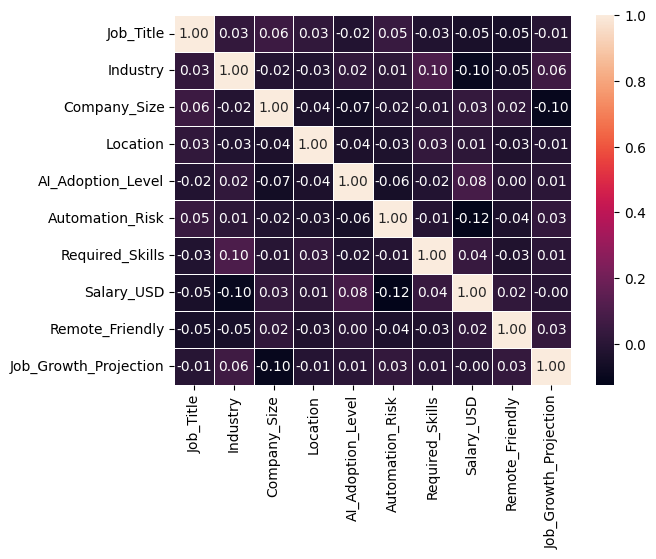

In [414]:
sns.heatmap(cor,annot=True,lw='0.5',fmt="0.2f")
plt.show()

# Building Model

### Separating Features and Target Variable from DataFrame

In [445]:
x=df.drop("Salary_USD",axis=1)
y=df["Salary_USD"]

### Splitting Data into Training and Testing Sets

In [446]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

### Displaying Shapes of Training and Testing Sets

In [447]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 9)
(125, 9)
(375,)
(125,)


### Initializing Lists for Model Evaluation Metrics

In [448]:
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR','xgboost']
Accuracy=[]
R2=[]
RMSE=[]

### Initializing Regression Models for Evaluation"

In [449]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()

model5=SVR()
model6=XGBRegressor()


### Model Evaluation Function with Metrics Calculation

In [450]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

def models(model):
    global x_train, y_train, x_test, y_test
    print(model)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict the class labels
    y_pred = model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    rmse= np.sqrt(mean_squared_error(y_test,y_pred))
    R2.append(r2)
    RMSE.append(rmse)
    # Check if the output is continuous (e.g., probabilities) and convert to class labels
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    
    # Check if y_test is also a 1D array
    if y_test.ndim > 1:
        y_test = y_test.flatten()

    # Ensure both y_test and y_pred are integers for classification metrics
    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)
    
    # Calculate the accuracy score
    accuracy = model.score(x_train, y_train)
    print("Accuracy score: {:.2f}".format(accuracy))
    Accuracy.append(accuracy)
    # Generate the confusion matrix
    

### Evaluating Linear Regression Model

In [451]:
models(model1)

LinearRegression()
Accuracy score: 0.03


### Evaluating Decision Tree Regressor Model


In [452]:
models(model2)

DecisionTreeRegressor()
Accuracy score: 1.00


### Evaluating Random Forest Regressor Model

In [453]:
models(model3)

RandomForestRegressor()
Accuracy score: 0.84


### Evaluating Gradient Boosting Regressor Model

In [454]:
models(model4)

GradientBoostingRegressor()
Accuracy score: 0.50


### Evaluating Support Vector Regressor (SVR) Model

In [455]:
models(model5)

SVR()
Accuracy score: -0.00


### Evaluating XGBoost Regressor Model

In [456]:
models(model6)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Accuracy score: 1.00


### Displaying the Length of Algorithm Lists and Evaluation Metrics

In [457]:
print(len(Algorithm))
print(len(Accuracy))
print(len(R2))
print(len(RMSE))


6
6
6
6


### Creating DataFrame to Summarize Model Evaluation Metrics

In [458]:
DF=pd.DataFrame({'Algorithm':Algorithm,"Accuracy":Accuracy,'R2_score':R2,'Rmse':RMSE})
DF

,Algorithm,Accuracy,R2_score,Rmse
0,LinearRegression,0.030203,0.020530,21961.596542
1,DecisionTreeRegressor,1.000000,-0.672207,28695.506192
2,RandomForestRegressor,0.837843,0.006794,22115.080627
3,GradientBoostingRegressor,0.498681,-0.008611,22285.927909
4,SVR,-0.000327,-0.008838,22288.436544
5,xgboost,0.999984,-0.226426,24574.774248


### Plotting R² Scores for Different Algorithms

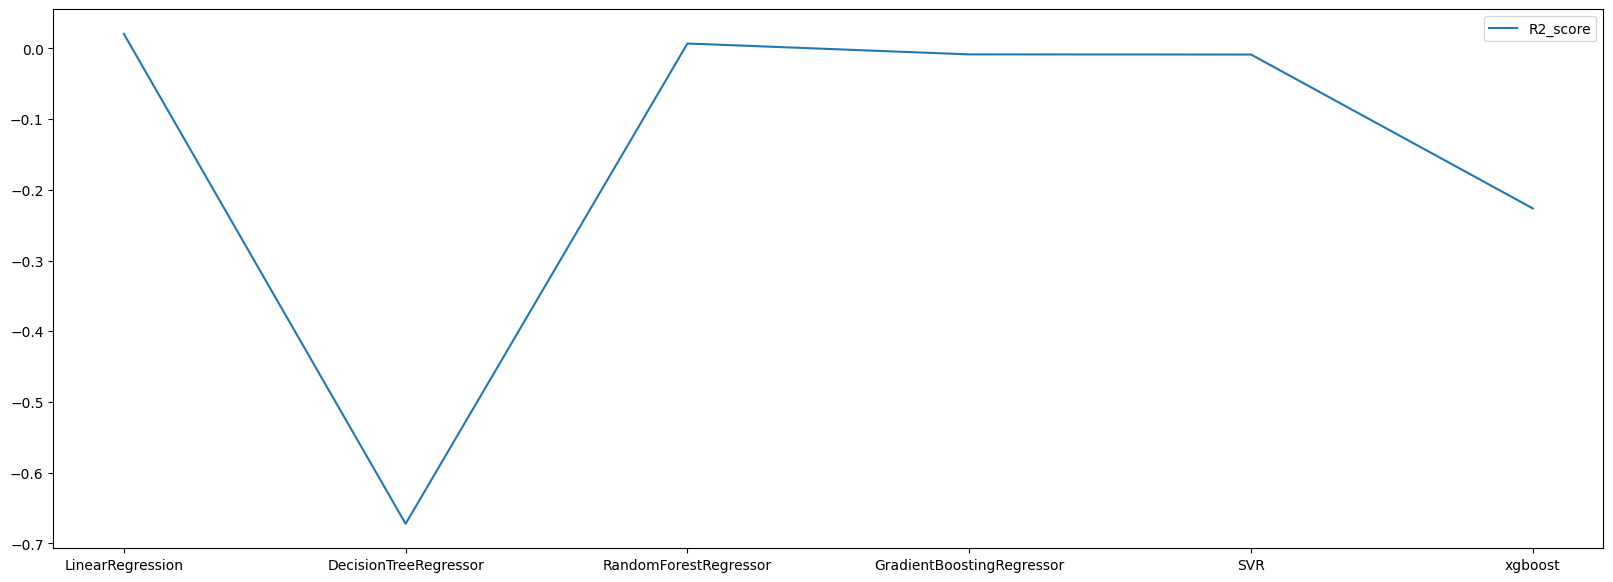

In [462]:
ig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.R2_score,label='R2_score')
plt.legend()
plt.show()

### Plotting RMSE for Different Algorithms

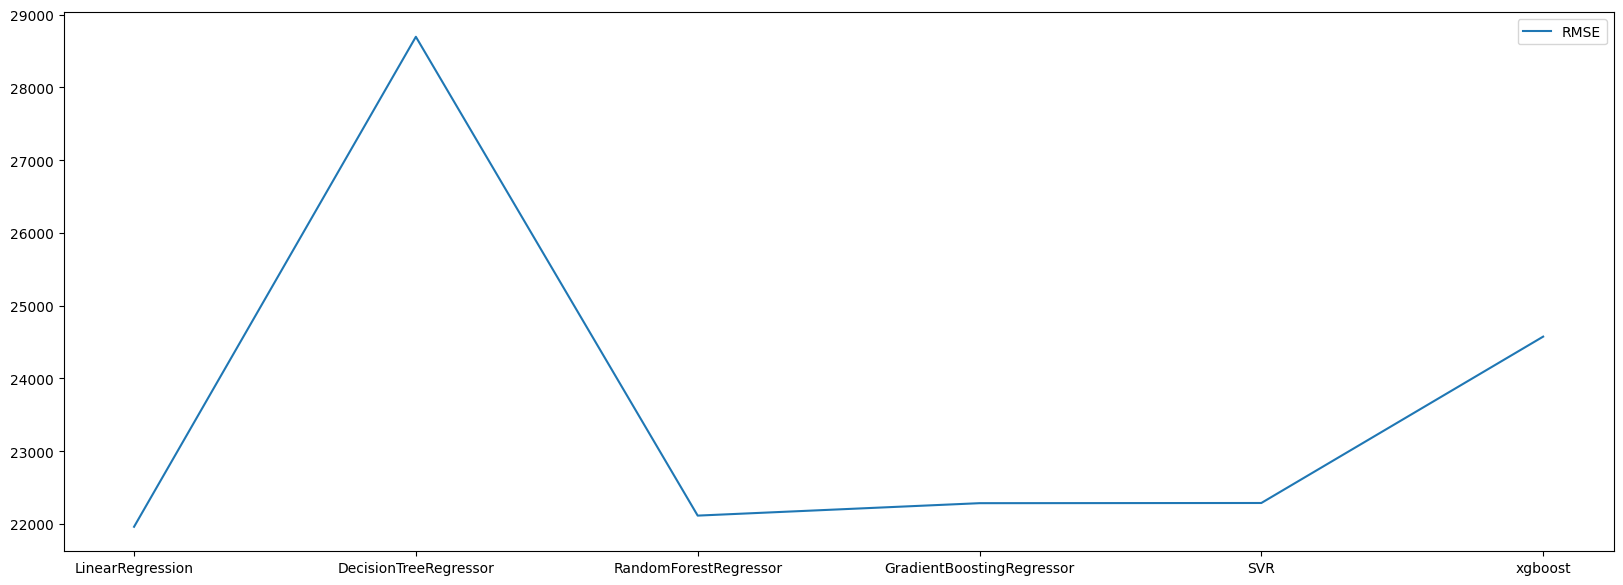

In [463]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.Rmse,label='RMSE')
plt.legend()
plt.show()

### Plotting Accuracy for Different Algorithms

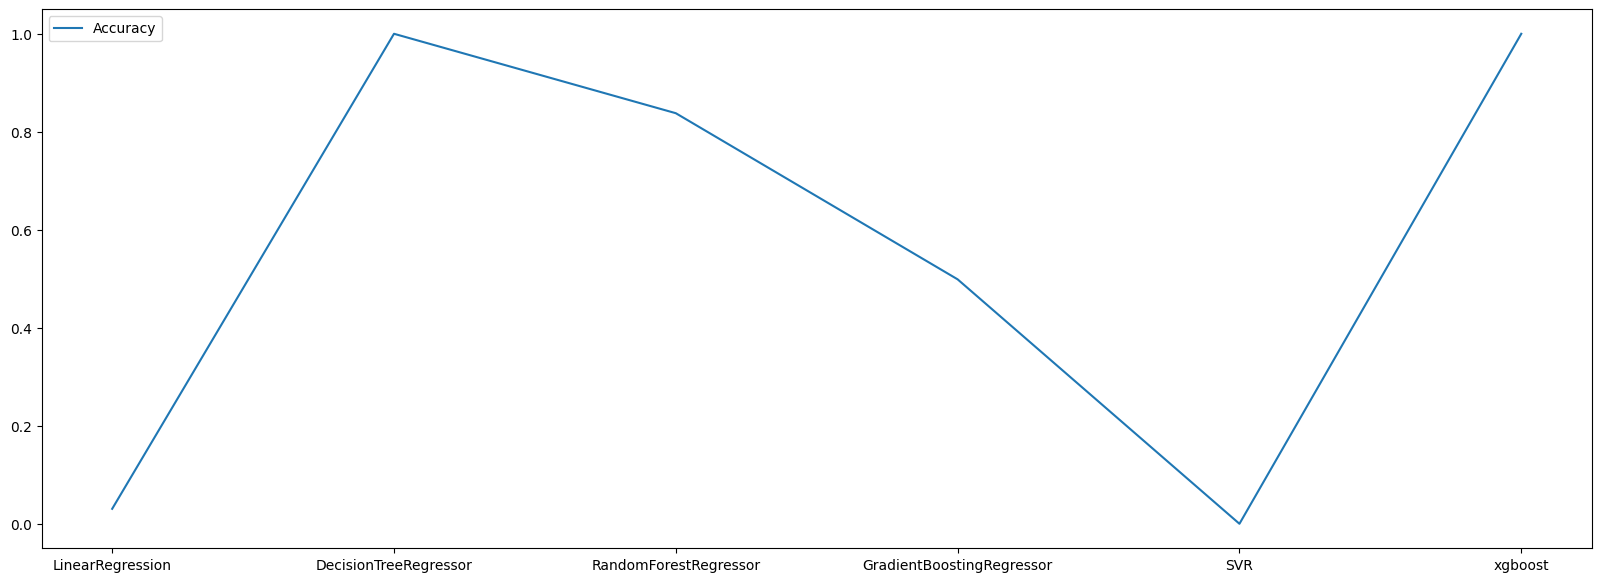

In [464]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.Accuracy,label='Accuracy')
plt.legend()
plt.show()